In [1]:
import pandas as pd

The command read_csv reads a file but does not converts into a workable data set.
This data frame is known as the pandas data frame

In [ ]:
df = pd.read_csv("housepricedata.csv")

In [3]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


Converts the data frame into arrays. Now the machine can process the data in the arrays.

In [4]:
dataset = df.values

In [5]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [6]:
X = dataset[:,0:10]

In [8]:
Y = dataset[:,10]

In [11]:
from sklearn import preprocessing as prp

In [14]:
min_max_scaler = prp.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [15]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

Split the data sets into training set, validation set and test set. 

In [18]:
from sklearn.model_selection import train_test_split as tts

In [20]:
X_train, X_val_and_test, Y_train, Y_val_and_test = tts(X_scale, Y, test_size=0.3)

In [21]:
X_val, X_test, Y_val, Y_test = tts(X_val_and_test,  Y_val_and_test, test_size=0.5)

In [22]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


Setting up the model architecture.
Combining different hyper parameters.
Keras used to build the model.

In [24]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


We will be using the Sequential model, which means that we merely need to describe the layers above in sequence. Our neural network has three layers:

Hidden layer 1: 32 neurons, ReLU activation
Hidden layer 2: 32 neurons, ReLU activation
Output Layer: 1 neuron, Sigmoid activation

In [27]:
model = Sequential([Dense(32, activation = 'relu', input_shape = (10,)),
                   Dense(32, activation = 'relu'),
                   Dense(1, activation = 'sigmoid')])

Compile the model by defining the parameters required for the optimizing, loss function model, and accuracy tracking on top of loss function

In [28]:
model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

Training on the data is pretty straightforward and requires us to write one line of code. The function is called 'fit' as we are fitting the parameters to the data. We specify:

what data we are training on, which is X_train and Y_train
the size of our mini-batch
how long we want to train it for (epochs)
what our validation data is so that the model will tell us how we are doing on the validation data at each point.
This function will output a history, which we save under the variable hist. We'll use this variable a little later.

The batch size is the size of the minibatch

In [29]:
hist = model.fit(X_train,Y_train, batch_size=32, epochs=100, validation_data = (X_val,Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 0s 228us/step - loss: 0.6747 - accuracy: 0.4990 - val_loss: 0.6800 - val_accuracy: 0.4840
Epoch 2/100
1022/1022 [==============================] - 0s 42us/step - loss: 0.6696 - accuracy: 0.4990 - val_loss: 0.6749 - val_accuracy: 0.4840
Epoch 3/100
1022/1022 [==============================] - 0s 38us/step - loss: 0.6649 - accuracy: 0.5010 - val_loss: 0.6705 - val_accuracy: 0.4840
Epoch 4/100
1022/1022 [==============================] - 0s 38us/step - loss: 0.6604 - accuracy: 0.5137 - val_loss: 0.6663 - val_accuracy: 0.5068
Epoch 5/100
1022/1022 [==============================] - 0s 38us/step - loss: 0.6561 - accuracy: 0.5558 - val_loss: 0.6622 - val_accuracy: 0.5434
Epoch 6/100
1022/1022 [==============================] - 0s 37us/step - loss: 0.6516 - accuracy: 0.5881 - val_loss: 0.6581 - val_accuracy: 0.6484
Epoch 7/100
1022/1022 [==============================] - 0s 38us/step - loss

The reason why we have the index 1 after the model.evaluate function is because the function returns the loss as the first element and the accuracy as the second element. To only output the accuracy, simply access the second element (which is indexed by 1, since the first element starts its indexing from 0).

In [33]:
model.evaluate(X_test, Y_test)[1]

219/219 [==============================] - 0s 23us/step


0.8630136847496033

Visualizing Loss and Accuracy

In [43]:
import matplotlib.pyplot as plt

LOSS and ACCURACY

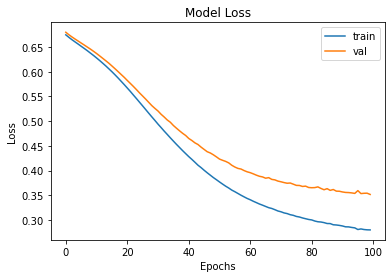

In [40]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Model Loss')
plt.legend(['train','val'])
plt.show()

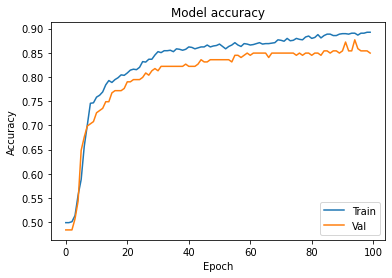

In [45]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Checking the effect of Regularization.
Creating a new model which has the problem of overfitting. Overfitting where the loss for Training is low and loss for Val is very high.

In [46]:
model_2 = Sequential([
    Dense(1000, activation = 'relu', input_shape = (10,)),
    Dense(1000, activation = 'relu'),
    Dense(1000, activation = 'relu'),
    Dense(1000, activation = 'relu'),
    Dense(1, activation = 'sigmoid')])

In [48]:
model_2.compile(optimizer  = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [49]:
hist_2 = model_2.fit(X_train,Y_train,batch_size = 32, epochs = 100, validation_data = (X_val,Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.4540 - accuracy: 0.7769 - val_loss: 0.4069 - val_accuracy: 0.8311
Epoch 2/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.3446 - accuracy: 0.8523 - val_loss: 0.4921 - val_accuracy: 0.8082
Epoch 3/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.3543 - accuracy: 0.8699 - val_loss: 0.3761 - val_accuracy: 0.8676
Epoch 4/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.2948 - accuracy: 0.8894 - val_loss: 0.3839 - val_accuracy: 0.8630
Epoch 5/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.2661 - accuracy: 0.8875 - val_loss: 0.3265 - val_accuracy: 0.8767
Epoch 6/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.2497 - accuracy: 0.8924 - val_loss: 0.3432 - val_accuracy: 0.8813
Epoch 7/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.2657

Epoch 57/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1681 - accuracy: 0.9247 - val_loss: 0.4561 - val_accuracy: 0.8630
Epoch 58/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1606 - accuracy: 0.9305 - val_loss: 0.3842 - val_accuracy: 0.8676
Epoch 59/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1616 - accuracy: 0.9266 - val_loss: 0.4152 - val_accuracy: 0.8813
Epoch 60/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1511 - accuracy: 0.9315 - val_loss: 0.4763 - val_accuracy: 0.8676
Epoch 61/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1420 - accuracy: 0.9472 - val_loss: 0.4484 - val_accuracy: 0.8493
Epoch 62/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1478 - accuracy: 0.9335 - val_loss: 0.4090 - val_accuracy: 0.8539
Epoch 63/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1373 - accuracy: 0.9481 - val_loss: 0.4682 -

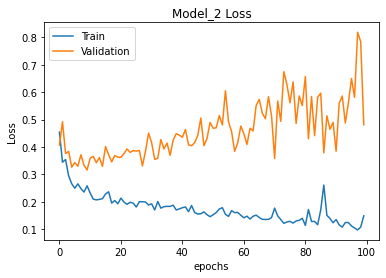

In [54]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model_2 Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['Train','Validation'])
plt.show()


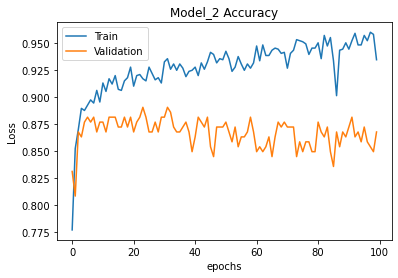

In [55]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model_2 Accuracy')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['Train','Validation'])
plt.show()

The plot represents an overfitting model. The validation has a high loss as compared to the loss of the train dataset

Now to remove the error of overfitting.

In [57]:
from keras.layers import Dropout
from keras import regularizers

#kernel_regularizer=regularizers.l2(0.01)
This tells Keras to include the squared values of those parameters in our overall loss function, and weight them by 0.01 in the loss function.

In [64]:
model_3 = Sequential([
    Dense(1000, activation = 'relu', kernel_regularizer = regularizers.l2(0.01),
          input_shape = (10,)),
    Dropout(0.3),
    Dense(1000, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation = 'relu',kernel_regularizer = regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation = 'sigmoid',kernel_regularizer = regularizers.l2(0.01))])

In [65]:
model_3.compile(optimizer = 'adam', loss = 'binary_crossentropy',
               metrics=['accuracy'])

In [68]:
hist_3 = model_3.fit(X_train, Y_train, batch_size = 32, epochs = 100,
                   validation_data = (X_val,Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 2s 2ms/step - loss: 14.2519 - accuracy: 0.6487 - val_loss: 3.9354 - val_accuracy: 0.6621
Epoch 2/100
1022/1022 [==============================] - 1s 1ms/step - loss: 1.6692 - accuracy: 0.8288 - val_loss: 0.7348 - val_accuracy: 0.8128
Epoch 3/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.5742 - accuracy: 0.8630 - val_loss: 0.5397 - val_accuracy: 0.8676
Epoch 4/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.5037 - accuracy: 0.8728 - val_loss: 0.5231 - val_accuracy: 0.8721
Epoch 5/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.5017 - accuracy: 0.8562 - val_loss: 0.5324 - val_accuracy: 0.8493
Epoch 6/100
1022/1022 [==============================] - 2s 1ms/step - loss: 0.4682 - accuracy: 0.8767 - val_loss: 0.5769 - val_accuracy: 0.8311
Epoch 7/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.473

1022/1022 [==============================] - 2s 2ms/step - loss: 0.4277 - accuracy: 0.8865 - val_loss: 0.4681 - val_accuracy: 0.8813
Epoch 57/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4335 - accuracy: 0.8806 - val_loss: 0.4877 - val_accuracy: 0.8630
Epoch 58/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4366 - accuracy: 0.8836 - val_loss: 0.4600 - val_accuracy: 0.8813
Epoch 59/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4387 - accuracy: 0.8699 - val_loss: 0.4574 - val_accuracy: 0.8904
Epoch 60/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.4517 - accuracy: 0.8718 - val_loss: 0.4629 - val_accuracy: 0.8813
Epoch 61/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.4223 - accuracy: 0.8826 - val_loss: 0.4553 - val_accuracy: 0.8904
Epoch 62/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.4321 - accuracy: 0.8855 - val_loss: 0.4610 - val_accuracy

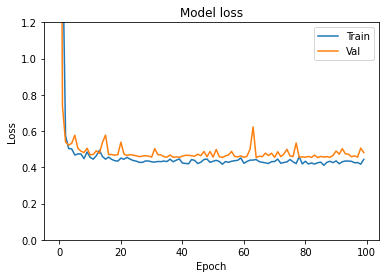

In [73]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

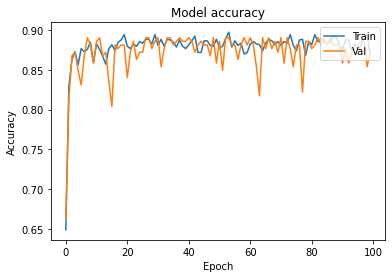

In [71]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()